This script is to be used to generate figures once the dfc files are computed.

## 1. Set parameters and load dataframe.

In [ ]:
import pandas as pd

dataframe_filename = "v1_df.csv"

def return_dataframe():
    return pd.read_csv(dataframe_filename).set_index("id")

df = return_dataframe()
print(df)

            number  GCaMP  age  cohort monitoring_frame_range sex  \
id                                                                  
M308-8_v1      308  False    8       2             (88, 7378)   F   
M308-10_v1     308  False   10       2            (111, 7328)   F   
M308-12_v1     308  False   12       2            (135, 7630)   F   
M308-14_v1     308  False   14       2            (107, 7269)   F   
M316-8_v1      316   True    8       3             (83, 7579)   F   
M316-10_v1     316   True   10       3            (104, 7207)   F   
M316-12_v1     316   True   12       3             (94, 7392)   F   
M322-6_v1      322   True    6       3            (140, 7572)   M   
M322-8_v1      322   True    8       3             (83, 7594)   M   
M322-10_v1     322   True   10       3             (45, 7308)   M   
M322-12_v1     322   True   12       3            (182, 7577)   M   
M353-6_v1      353   True    6       5             (97, 7497)   M   
M353-8_v1      353   True    8    

In [ ]:
from toolbox_jocha.hdf5 import get_data_from_dataset
from toolbox_jocha.ets import split_into_bins

# "308-8", "308-10", "308-12", "308-14", "316-8", "316-10"
# "316-12", "322-6", "322-8", "322-10", "322-12", "353-6"    
# "353-8", "353-10", "361-6", "365-6", "367-6", "374-6"
# "374-8", "374-10", "387-6", "387-10", "396-6", "397-6"
# "410-6", "410-8", "410-10", "412-8", "412-10", "415-6", "415-8"

# Set the following parameters
""
graphs = [("")]
output_file_id = "v1"
n_segments = 20
segmenting_str = "GCaMP"

indexes = [f"M{mouse_num}_{output_file_id}" for mouse_num in mice_num]
n_mice = len(mice_num)


def signals_filename(mouse_num, filename_str):
    return f"D:/mouse_data/new_data/M{mouse_num}/formatted/M{mouse_num}_{filename_str}.h5"

def dfc_filename(mouse_num, filename_str, signal_str):
    return f"D:/mouse_data/new_data/M{mouse_num}/formatted/M{mouse_num}_{filename_str}_{signal_str}_dfc.h5"

## 2. Functional Representativity (segment FC vs whole FC)

Computes the correlation between FC of a specific segment and the FC of the whole imaging session. Compare with results from Esfahlani et al.

TODO: Add a hline marking the whole modularity in the second graph

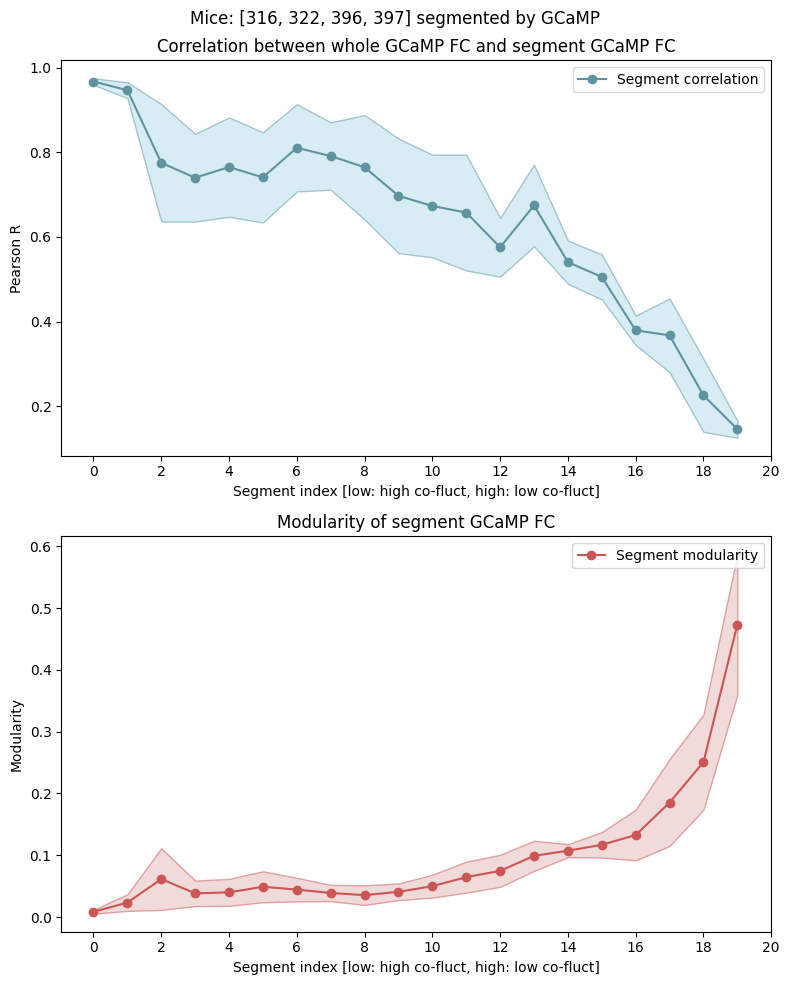

In [26]:
import matplotlib.pyplot as plt

# Compute stdev and mean prior to plotting
stdev_correlations = np.std(FC_correl, axis=0)
mean_correlations = np.mean(FC_correl, axis=0)
stdev_modularity = np.std(FC_modularity, axis=0)
mean_modularity = np.mean(FC_modularity, axis=0)

# Plotting
main_red = "#CC5555" # Red
fill_red = "#E4B6B6" # Red
main_blue = "#5F93A0" # Blue
fill_blue = "#B0DDE8" # Blue

fig, axes = plt.subplots(2, 1, figsize=(8, 10))


fig.suptitle(f"Mice: {mice_nums} segmented by {cts_str}")

x = np.arange(0, n_segments, 1)
xticks = list(range(0, n_segments+1, 2))

axes[0].plot(x, mean_correlations, marker='o', color=main_blue, label='Segment correlation')
axes[0].fill_between(x, mean_correlations-stdev_correlations, mean_correlations+stdev_correlations,
                     alpha=0.5, edgecolor=main_blue, facecolor=fill_blue)
axes[0].set_xlabel("Segment index [low: high co-fluct, high: low co-fluct]")
axes[0].set_ylabel("Pearson R")
axes[0].set_title(f"Correlation between whole {signal_str} FC and segment {signal_str} FC")
axes[0].set_xticks(xticks)
axes[0].legend()

axes[1].plot(x, mean_modularity, marker='o', color=main_red, label="Segment modularity")
axes[1].fill_between(x, mean_modularity-stdev_modularity, mean_modularity+stdev_modularity,
                     alpha=0.5, edgecolor=main_red, facecolor=fill_red)
axes[1].set_xlabel("Segment index [low: high co-fluct, high: low co-fluct]")
axes[1].set_ylabel("Modularity")
axes[1].set_title(f"Modularity of segment {signal_str} FC")
axes[1].set_xticks(xticks)
axes[1].legend()

plt.tight_layout()

if save_figs:
    for extension in save_formats:
        plt.savefig(f"figs/{save_identifier}_FC_correl_and_modularity"+extension)

plt.show()



### Plot only first and last segment of correl

TODO: update for modularity as well?

In [27]:
# Default params
params = {"scatter_colors": ["#CC5555", "#5F93A0", "#875FA0", "#7FA05F"],
          "edge_colors": ["#662121", "#193e47", "#431c5c", "#325213"],
          "x1": 0,
          "x2": 0.4,
          "figsize": (5, 5),
          "yticks": [0.0, 0.5, 1.0],}


def plot_data_scatter(set1, set2, ylabel, title=None, scatter_colors=params["scatter_colors"], edge_colors=params["edge_colors"],
                      x1=params["x1"], x2=params["x2"], figsize=params["figsize"], yticks=params["yticks"]):

    n_points = len(set1)
    positions = [0, 1]

    rng = np.random.default_rng(3)
    jitter_strength = 0.08
    jitter = rng.uniform(-jitter_strength, jitter_strength, size=n_points)

    fig, ax = plt.subplots(figsize=figsize)
    for i in range(n_points):
        x1_jit = x1 + jitter[i]
        x2_jit = x2 + jitter[i]
        ax.scatter(x1_jit, set1[i], color=scatter_colors[i], edgecolor=edge_colors[i], s=100, linewidth=1.2, zorder=3)
        ax.scatter(x2_jit, set2[i], color=scatter_colors[i], edgecolor=edge_colors[i], s=100, linewidth=1.2, zorder=3)
        ax.plot([x1_jit, x2_jit], [set1[i], set2[i]], color='lightgray', linestyle='-', linewidth=1, zorder=2)


    y_min = min(min(set1), min(set2))
    y_max = max(max(set1), max(set2))
    padding = (y_max - y_min) * 0.2  # 20% padding
    ax.set_xlim(x1 - 0.15, x2 + 0.1)
    ax.set_ylim(yticks[0]-0.2, yticks[-1]+0.1)

    # plt.semilogy()

    # Aesthetics
    ax.set_xticks([x1, x2])
    ax.set_yticks(yticks)
    ax.set_xticklabels([f'Top {(100/n_segments):.2f}%\nof co-fluct.', f'Bottom {(100/n_segments):.2f}%\nof co-fluct.'])
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # legend_text = f"Bootstrap median: {median_est:.2f}\n95% CI: [{ci_low:.2f}, {ci_high:.2f}]\np-value < 0.001"
    # ax.text(0.5, y_max + padding * 0.3, legend_text,
    #         ha='left', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'),
    #         transform=ax.transAxes)

    return fig, ax


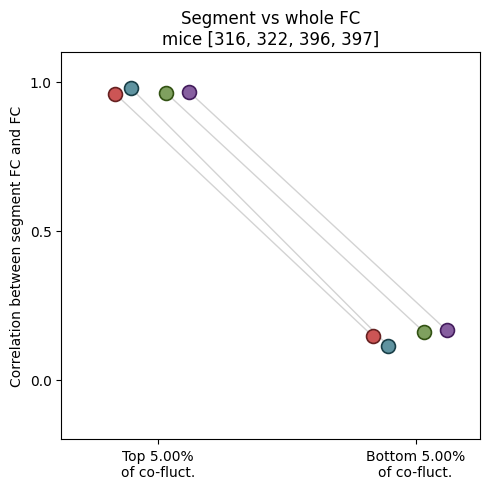

In [28]:
set1, set2 = FC_correl[:,0], FC_correl[:,-1]

fig, ax = plot_data_scatter(set1, set2, ylabel='Correlation between segment FC and FC', title=f'Segment vs whole FC\nmice {mice_nums}', **params)

plt.tight_layout()

if save_figs:
    for extension in save_formats:
        plt.savefig(f"figs/{save_identifier}_FC_correl_scatter"+extension)

plt.show()

## 3. Functional similarity

Compute the correlation between the FC segment of GCaMP and the FC segment of dHbT.

TODO: Add a hline marking the whole neurovasc_coupling / funcscim? By color?

In [29]:
import numpy as np

functional_similarity = np.zeros((n_mice, n_segments))

for i, mouse_num in enumerate(mice_nums):

    GCaMP_dfc, _ = get_data_from_dataset(dfc_filename(mouse_num, filename_str, "GCaMP"), "dfc")
    HbT_dfc, _ = get_data_from_dataset(dfc_filename(mouse_num, filename_str, "HbT"), "dfc")

    for j, indices in enumerate(segment_indices[i]): # The j-th segment of mouse i

        sliced_GCaMP_dfc = GCaMP_dfc[indices,:]
        sliced_HbT_dfc = HbT_dfc[indices,:]

        # Functional similarity
        GCaMP_segment_FC = np.mean(sliced_GCaMP_dfc, axis=0)
        HbT_segment_FC = np.mean(sliced_HbT_dfc, axis=0)

        funcsim = np.corrcoef(GCaMP_segment_FC, HbT_segment_FC)[0,1]

        functional_similarity[i, j] = funcsim


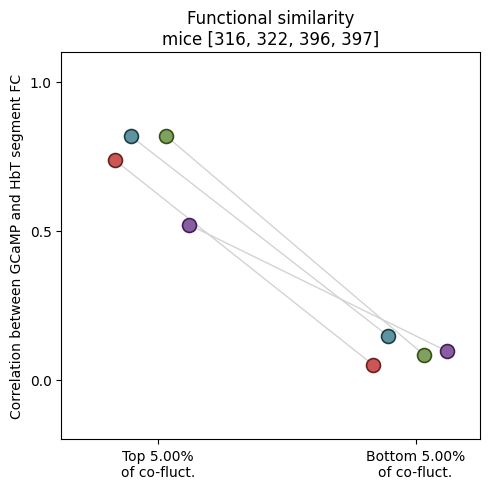

In [30]:
set1, set2 = functional_similarity[:,0], functional_similarity[:,-1]

fig, ax = plot_data_scatter(set1, set2, ylabel='Correlation between GCaMP and HbT segment FC', title=f'Functional similarity\nmice {mice_nums}', **params)

plt.tight_layout()

if save_figs:
    for extension in save_formats:
        plt.savefig(f"figs/{save_identifier}_funcsim"+extension)

plt.show()

## 4. Neurovascular coupling

Compute the mean pixelwise correlation (with optimal lag within a window) between GCaMP and dHbT signals.

TODO: Add a hline marking the whole neurcoup

In [ ]:
import numpy as np
from toolbox_jocha.correlation import r_coeff_2mats

squared_r = False
compute_lag = True
max_shift_seconds = 5
fps = 3
convert_to_s = True

max_shift = max_shift_seconds * fps
neurovascular_coupling = np.zeros((n_mice, n_segments))
lag = np.zeros((n_mice, n_segments))

for i, mouse_num in enumerate(mice_nums):

    GCaMP_signal, _ = get_data_from_dataset(signals_filename(mouse_num, filename_str), "data/3d/GCaMP")
    HbT_signal, _ = get_data_from_dataset(signals_filename(mouse_num, filename_str), "data/3d/HbT")

    for j, indices in enumerate(segment_indices[i]): # The j-th segment of mouse i

        sliced_GCaMP_signal = GCaMP_signal[indices,:,:]
        sliced_HbT_signal = HbT_signal[indices,:,:]

        lag_mat, correlation_mat = r_coeff_2mats(sliced_GCaMP_signal, sliced_HbT_signal, max_shift=max_shift, lag=compute_lag, convert_to_s=convert_to_s, fps=fps, squared=squared_r)

        neurovascular_coupling[i,j] = np.nanmean(correlation_mat)
        lag[i,j] = np.nanmean(lag_mat)


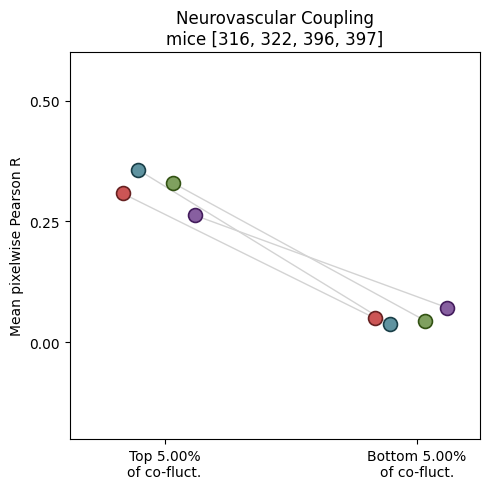

In [32]:
set1, set2 = neurovascular_coupling[:,0], neurovascular_coupling[:,-1]

params["yticks"] = [0, 0.25, 0.5]

fig, ax = plot_data_scatter(set1, set2, ylabel='Mean pixelwise Pearson R', title=f'Neurovascular Coupling\nmice {mice_nums}', **params)

plt.tight_layout()

if save_figs:
    for extension in save_formats:
        plt.savefig(f"figs/{save_identifier}_neurcoup"+extension)

plt.show()

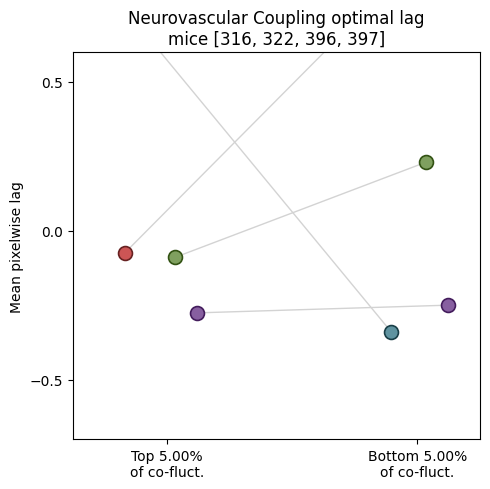

In [33]:
set1, set2 = lag[:,0], lag[:,-1]

params["yticks"] = [-0.5, 0, 0.5]

fig, ax = plot_data_scatter(set1, set2, ylabel='Mean pixelwise lag', title=f'Neurovascular Coupling optimal lag\nmice {mice_nums}', **params)

plt.tight_layout()

if save_figs:
    for extension in save_formats:
        plt.savefig(f"figs/{save_identifier}_lag_neurcoup"+extension)

plt.show()